In [2]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

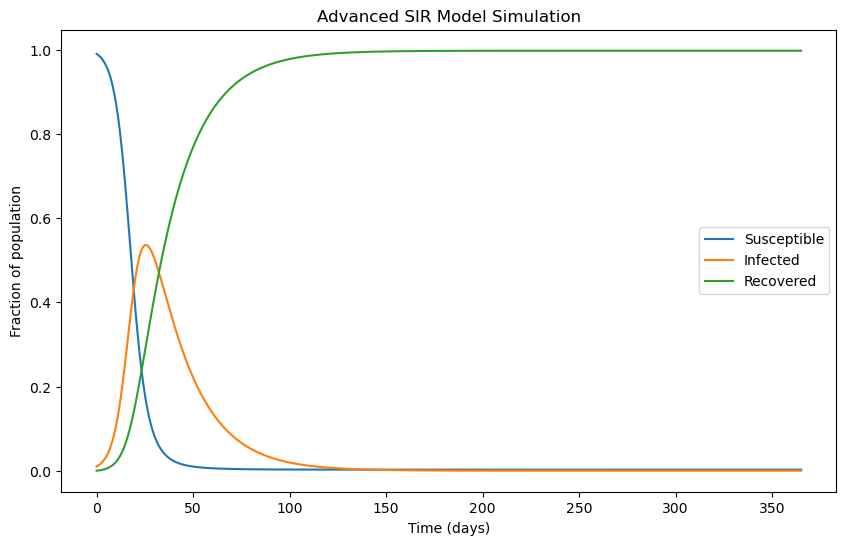

Basic reproduction number R0: 5.94
Contact ratio q: 6.00
Peak infected fraction Imax: 0.536
Final recovered fraction R∞: 0.901


In [30]:
def sir(y, t, r, a):
    S, I, R = y
    dSdt = -r * I * S
    dIdt = r * I * S - a * I
    dRdt = a * I
    return [dSdt, dIdt, dRdt]

# Parameters
S0 = 0.99
I0 = 0.01
R0_init = 0
y0 = [S0, I0, R0_init]

r = 0.3 # rate of contact
a = 0.05 # recovery rate 

t = np.linspace(0, 365, 365)

solution = odeint(sir, y0, t, args=(r, a))
S, I, R = solution.T

plt.figure(figsize=(10,6))
plt.plot(t, S, label="Susceptible")
plt.plot(t, I, label="Infected")
plt.plot(t, R, label="Recovered")
plt.xlabel("Time (days)")
plt.ylabel("Fraction of population")
plt.title("Advanced SIR Model Simulation")
plt.legend()
plt.show()

q = r / a
R0 = r * S0 / a

# I_max occurs when S = 1/q
S_peak = 1 / q
I_max = I0 + S0 - (1/q) * (1 + np.log(q * S0))

# Solve final S_inf numerically from implicit equation
def final_S(S_inf):
    return S_inf - (1/q) * np.log(S_inf) - (I0 + S0 - (1/q) * np.log(S0))

#S_inf_solution = fsolve(final_S, S0*0.1)[0]
R_inf = 1 - S_inf_solution

print(f"Basic reproduction number R0: {R0:.2f}")
print(f"Contact ratio q: {q:.2f}")
print(f"Peak infected fraction Imax: {I_max:.3f}")
#print(f"Final susceptible fraction S∞: {S_inf_solution:.3f}")
print(f"Final recovered fraction R∞: {R_inf:.3f}")